In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
train = read_excel('https://data.hossam.kr/F03/biostat.xlsx')

In [3]:
train.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


In [4]:
# OP_date, Recur_ly, Recur_date, post.CA19.9.binary, post.CA19.9.3grp
df = train.drop(['OP_date', 'Recur_1y', 'Recur_date', 'post.CA19.9.binary', 'post.CA19.9.3grp', 'sex', 'id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          156 non-null    int64  
 1   weight       156 non-null    float64
 2   Recur        156 non-null    int64  
 3   SBP          156 non-null    float64
 4   CA19.9       156 non-null    float64
 5   CRP          156 non-null    float64
 6   CEA          156 non-null    float64
 7   post.CEA     156 non-null    float64
 8   stage        156 non-null    int64  
 9   smoking      156 non-null    int64  
 10  obesity      156 non-null    int64  
 11  post.CA19.9  156 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 14.8 KB


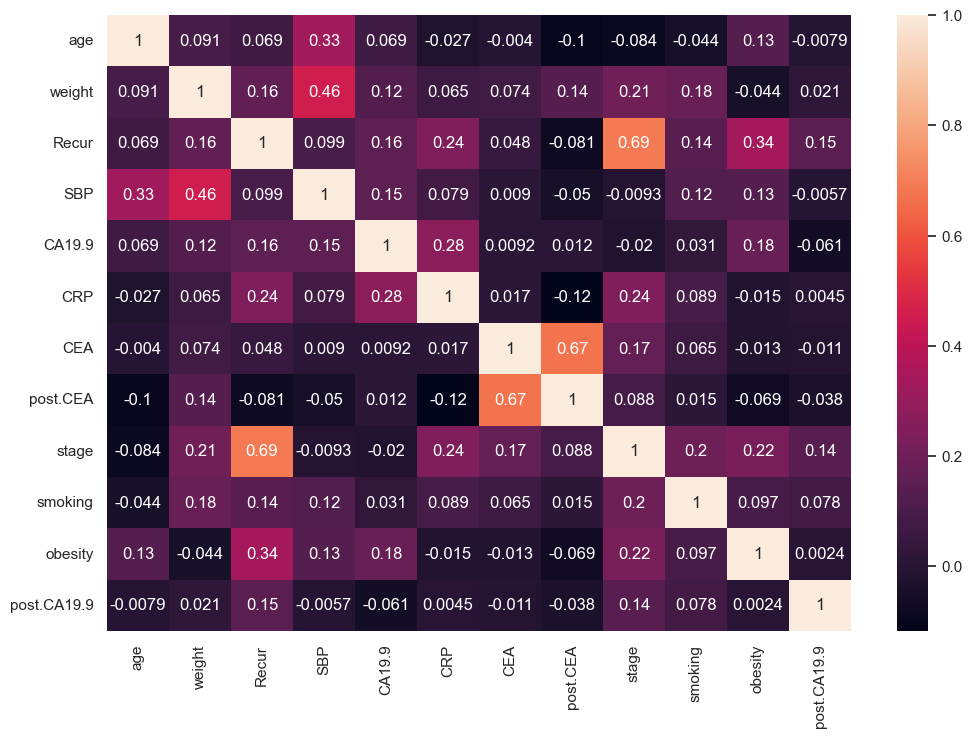

In [7]:
plt.figure(figsize=(12,8))
sb.set(font_scale=1.0)
sb.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [8]:
# stage, CRP, obesity, CA19.9, weight, Recur
x = df[['stage', 'CRP', 'obesity', 'CA19.9', 'weight']]
y = df[['Recur']]

In [9]:
x.describe()

,stage,CRP,obesity,CA19.9,weight
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2.269231,3.062821,0.384615,1158.631410,68.125624
std,0.813960,3.550361,0.488071,6709.440806,14.467480
min,1.000000,0.100000,0.000000,1.000000,40.000000
25%,2.000000,0.100000,0.000000,10.400000,58.257205
50%,2.500000,1.300000,0.000000,23.150000,69.084391
75%,3.000000,4.850000,1.000000,61.725000,80.053547
max,3.000000,12.300000,1.000000,48599.800000,95.000000


In [10]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
print(x_scale.shape)
x_scale

NameError: name 'StandardScaler' is not defined